In [1]:
import numpy as np
from keras.models import Sequential
from keras.preprocessing import sequence
from keras.layers import Dropout
from keras.layers import  Dense, Embedding, LSTM, Bidirectional

Importing the dataset

Loading IMDB standard dataset using the Keras dataset class.

In [2]:
from keras.datasets import imdb
(x_train, y_train),(x_test, y_test) = imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


Feature Extraction

Since we have text data in x_train and x_test of having an uneven length. Our goal is to convert this text data into a numerical form in order to feed it into the model.

Make the length of texts equal using padding.

We are defining max_len = 200. If a sentence is having a length greater than 200 it will be trimmed off otherwise it will be padded by 0.

In [4]:
max_len = 200
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)
y_test = np.array(y_test)
y_train = np.array(y_train)

In [5]:
x_train.shape, y_train.shape

((25000, 200), (25000,))

In [6]:
x_test.shape, y_test.shape

((25000, 200), (25000,))

Designing the Bi-directional LSTM 


You can either use Sequential or Functional API to create the model. here we are using Sequential API.



In [10]:
n_unique_words= 10000

model = Sequential()
model.add(Embedding(n_unique_words, 128, input_length=max_len))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

input_length = maxlen Since we have already made all sentences in our dataset have an equal length of 200 using pad_sequence.

The Embedding layer takes n_unique_words as the size of the vocabulary in our dataset which we already declared as 10000.

After the Embedding layer, we are adding Bi-directional LSTM units.
Using sigmoid activation and then compiling the model

Training the model

We have prepared our dataset and model not calling the fit method to train our model.

In [13]:
batch_size= 250

history=model.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=12,
           validation_data=[x_test, y_test])
print(history.history['loss'])
print(history.history['accuracy'])

Epoch 1/12
100/100 [==============================] - 149s 1s/step - loss: 0.3790 - accuracy: 0.8480 - val_loss: 0.3111 - val_accuracy: 0.8699
Epoch 2/12
100/100 [==============================] - 146s 1s/step - loss: 0.2340 - accuracy: 0.9156 - val_loss: 0.3197 - val_accuracy: 0.8675
Epoch 3/12
100/100 [==============================] - 147s 1s/step - loss: 0.1820 - accuracy: 0.9370 - val_loss: 0.3122 - val_accuracy: 0.8702
Epoch 4/12
100/100 [==============================] - 145s 1s/step - loss: 0.1394 - accuracy: 0.9534 - val_loss: 0.3520 - val_accuracy: 0.8646
Epoch 5/12
100/100 [==============================] - 146s 1s/step - loss: 0.1065 - accuracy: 0.9652 - val_loss: 0.4495 - val_accuracy: 0.8550
Epoch 6/12
100/100 [==============================] - 144s 1s/step - loss: 0.0899 - accuracy: 0.9717 - val_loss: 0.4798 - val_accuracy: 0.8585
Epoch 7/12
100/100 [==============================] - 144s 1s/step - loss: 0.0812 - accuracy: 0.9741 - val_loss: 0.5047 - val_accuracy: 0.8525

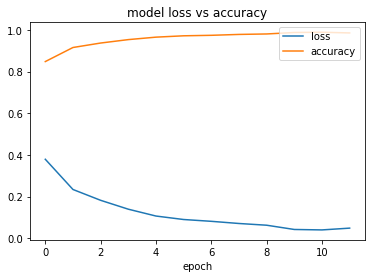

In [14]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['accuracy'])
pyplot.title('model loss vs accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['loss', 'accuracy'], loc='upper right')
pyplot.show()

As you can see the accuracy line is nearly touching the one and loss is minimum very close to zero. However, you can go ahead and draw some predictions using the model.